<h2>Tools</h2>

In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")

<h2>Dataset</h2>

In [43]:
data = pd.read_csv("NB_flightDelays_prepared.csv")
data.head(10) #target = delay e ['ontime', 'delayed']

,schedtime,carrier,dest,distance,flightnumber,origin,weather,dayweek,weekmonth,tailnu,delay
0,14,OH,JFK,184,5,BWI,0,4,0,A,ontime
1,16,DH,JFK,213,6,DCA,0,4,0,J,ontime
2,12,DH,LGA,229,7,IAD,0,4,0,R,ontime
3,17,DH,LGA,229,7,IAD,0,4,0,R,ontime
4,10,DH,LGA,229,7,IAD,0,4,0,R,ontime
5,8,DH,JFK,228,7,IAD,0,4,0,R,ontime
6,12,DH,JFK,228,7,IAD,0,4,0,E,ontime
7,16,DH,JFK,228,7,IAD,0,4,0,E,ontime
8,17,DH,JFK,228,7,IAD,0,4,0,E,ontime
9,21,DH,JFK,228,7,IAD,0,4,0,R,ontime


<Axes: >

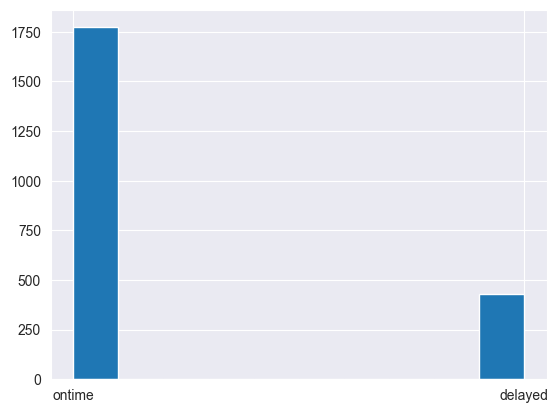

In [44]:
data["delay"].hist()

![Alt text](image-13.png)

<h3>prior P(Y)</h3>

In [45]:
#df -> dataframe
#Y -> target variable
def calculate_prior(df, Y):
    classes = sorted(list( df[Y].unique() )) #Y e [0,1]<--classes
    prior = []
    for clas in classes: # in [0,1]
        prior.append( len( df[ df[Y]==clas ] ) / len(df) )
    return prior

In [46]:
sorted(list(data['delay'].unique()))

['delayed', 'ontime']

In [47]:
calculate_prior(data, 'delay')

[0.19445706497046797, 0.805542935029532]

In [48]:
sum(calculate_prior(data, 'delay'))

1.0

<h3>likelihood P(X|Y)</h3>

In [49]:
#df -> dataframe: data
#feat_name -> feature name: [schedtime, carrier, dest, distance, flightnumber, origin, weather, dayweek, weekmonth, tailnu]	
#feat_val -> feature value
#Y -> target variable: 'delay'
#label -> class label: [ontime, delayed]

def calculate_naive_likelihood(df, feat_name, feat_val, Y, label):
    df = df[ df[Y]==label ]
    numerator = len( df[ df[feat_name]==feat_val ] )
    denominator = len(df)
    return numerator / denominator

In [50]:
calculate_naive_likelihood(data, "schedtime", 17, "delay", 'ontime') * 100

10.039481105470953

<h1>Naive Bayes</h1> <b>Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum</b>

In [51]:
def naive_bayes(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1] #columns except Y --> ex. [schedtime, carrier, dest, distance, flightnumber, origin, weather, dayweek, weekmonth, tailnu]	

    # calculate prior
    prior = calculate_prior(df, Y) #P(Y)

    Y_pred = []
    
    # loop over every data sample
    for x in X:
        # calculate likelihood
        classes = sorted(list(df[Y].unique())) #ex. Y e [ontime, delayed]<--classes
        likelihood = [1]*len(classes) 
        for j in range(len(classes)): #ex. j e Y[ontime, delayed]
            for i in range(len(features)): #ex. i e X[schedtime, carrier, dest, distance, flightnumber, origin, weather, dayweek, weekmonth, tailnu]
                likelihood[j] *= calculate_naive_likelihood(df, features[i], x[i], Y, classes[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(classes)
        for j in range(len(classes)):
            post_prob[j] = likelihood[j] * prior[j]

        #Y_pred.append(np.argmax(post_prob))
        Y_pred.append(classes[np.argmax(post_prob)]) 

    return np.array(Y_pred) 

<h3>aplicamos</h3>

In [52]:
#print unique values for every column
for col in data.columns:
    print(col, ":", sorted(data[col].unique()))
    

schedtime : [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
carrier : ['CO', 'DH', 'DL', 'MQ', 'OH', 'RU', 'UA', 'US']
dest : ['EWR', 'JFK', 'LGA']
distance : [169, 184, 199, 213, 214, 228, 229]
flightnumber : [0, 1, 2, 3, 4, 5, 6, 7]
origin : ['BWI', 'DCA', 'IAD']
weather : [0, 1]
dayweek : [1, 2, 3, 4, 5, 6, 7]
weekmonth : [0, 1, 2, 3, 4]
tailnu : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'E', 'J', 'L', 'N', 'Q', 'R', 'W', 'Z']
delay : ['delayed', 'ontime']


In [53]:
#[schedtime, carrier, dest, distance, flightnumber, origin, weather, dayweek, weekmonth, tailnu]	
X = [[17, 'DH', 'JFK', 228, 7, 'IAD', 0, 2, 1, 'E'], 
     [12, 'DH', 'JFK', 228, 7, 'IAD', 1, 4, 0, 'E']]  


#  estimated value of Y given that X = (17, 'DH', 'JFK', 228, 7, 'IAD', 0, 4, 0, 'E')

predictions = naive_bayes(data, X, "delay")

predictions

array(['ontime', 'delayed'], dtype='<U7')